In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import json
%matplotlib widget

Colors = json.load(open('../config.json'))

In [33]:
# Importing Data

data1 = np.loadtxt("data/data1.txt",delimiter=',',dtype='float') # Sr/length of the section/start time/end time
data2 = np.loadtxt("data/data2.txt",delimiter=',',dtype='float') # Sr/length of the section/start time/end time
data3 = np.loadtxt("data/data4.txt",delimiter=',',dtype='float') # MagnField/distance(m)

In [3]:
# def divide_chunks(l,n):
#     for i in range(0,len(l),n):
#         yield l[i:i+n]

# n = 3
# nData1 = list(divide_chunks(data1,n))

In [4]:
# Calculating Velocity

time11 = data1[:,2]
time12 = data1[:,3]
dist1 = data1[:,1] / 100

timeInst = []
for i in range(len(time12)):
    timeInst.append(time12[i]-time11[i])

print(timeInst)

velc = []
for i in range(len(timeInst)):
    velc.append(dist1[i]/timeInst[i])
print(np.average(velc))

[0.10000000000000009, 0.07200000000000006, 0.05600000000000005, 0.09600000000000009, 0.07200000000000006, 0.05400000000000005, 0.09800000000000009, 0.07200000000000006, 0.05799999999999983]
2.783686418160281


In [5]:
# Calculating Acceleration of gravity

grav = []
for i in range(0,len(timeInst)):
    grav.append((velc[i]-velc[i-1])/timeInst[i-1])

# Can improve this im just lazy

grav = [8.494444444444433, 9.800176366843008,7.993344907407396, 11.509773662551412,8.257554722569287, 8.015378884631922]
print(np.average(grav),np.std(grav))
g = 8.993 # avg of all the values

9.01177883140791 1.2733196925149604


In [6]:
# Calculating Terminal Velocity

time21 = data2[:,2]
time22 = data2[:,3]
dist2 = data2[:,1] / 100

timeInst2 = []
for i in range(len(time22)):
    timeInst2.append(time22[i]-time21[i])

termVelc = []
for i in range(len(timeInst2)):
    termVelc.append(dist2[i]/timeInst2[i])

print(termVelc)

velcT = np.average(termVelc)

print(velcT)



[0.7695312499999999, 0.8055555555555556, 0.6936619718309863, 0.8140495867768595, 0.8252032520325204, 0.8491379310344835, 0.7635658914728681, 0.8055555555555564, 0.7879999999999999, 0.7635658914728681, 0.7249999999999994, 0.6700680272108852, 0.8277310924369763, 0.8388429752066117, 0.8008130081300798, 0.8073770491803285, 0.7868217054263567, 0.7296296296296307, 0.7576923076923082, 0.7992125984251955, 0.7755905511811036, 0.7695312499999992, 0.7748091603053449, 0.6042944785276063, 0.7755905511811036, 0.812, 0.7695312499999992, 0.7695312499999992, 0.7198581560283688, 0.6700680272108852]
0.7687273317834826


[20.  16.  13.5 12.  10.   8.   7.5  6.   5.   4. ]
[300. 250. 210. 175. 150. 125. 100.  75.  50.  25.]
Slope: 0.057696645052156756 Intercept: 1.7762898223851125
MagneticMoment: 0.11539329010431351


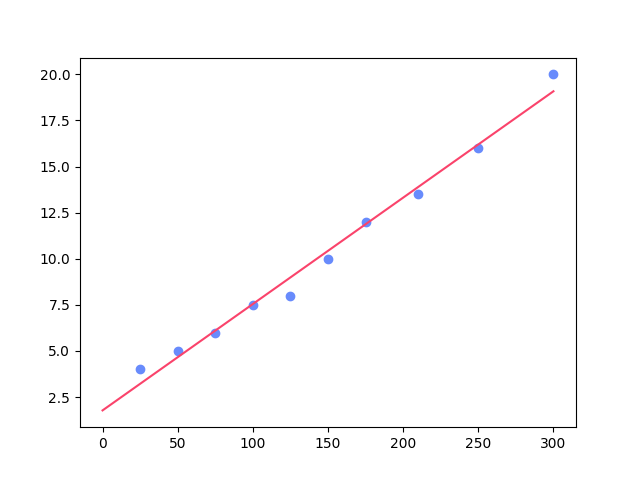

In [34]:
# Calculating Magnetic Moment and plotting the graph

magn = data3[:,0] # in T
dist3 = data3[:,1] # in m

print(magn)

print(dist3)


x = np.arange(0,300,0.01)
aFit, bFit = np.polyfit(dist3,magn,1)

print("Slope:",aFit,"Intercept:",bFit)
magMoment = aFit*2
print("MagneticMoment:",magMoment)

plt.clf()
plt.scatter(dist3,magn,color=Colors.get('Blue'))
plt.plot(x,aFit*x+bFit,color=Colors.get('Red'))
plt.show()

In [37]:
# Calculating value of k

def sVal(k,t,m,a,l):
    return (k*192*(a**4))/(a*(1-(1/(l**3)))*(45*(np.pi**2)*t*m**2))

mass = 0.076 # Mass of the object in kg # placeholder

k = mass*g/velcT
print(k)
m = magMoment
a = 3.5/2 # Inner Radius
b = 4.4/2 # Outer Radius
t = b - a
l = b/a
Sigma = sVal(k,t,m,a,l)
print(Sigma)

0.8890902817444033
692.1506347278457


In [38]:
# Calculating Current

def di(e,dA,s,l):
    return e*s*dA/l

dA = 2*np.pi*a*t
B = 1 # placeholder

current = di(7.85,dA,Sigma,0.09)

print(current)

298715.80360164074


In [11]:

val = 300
print(1/(val**(1/3)))

0.14938015821857217
